<a href="https://colab.research.google.com/github/Greg9998/Demo111/blob/master/HARP_Exploratory.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [12]:
# clear all
from IPython import get_ipython
get_ipython().magic('reset -sf')

In [19]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
import sklearn.metrics
from sklearn.preprocessing import OrdinalEncoder #Categorical replacement
from sklearn.model_selection import train_test_split #random train-test subsets

#Settings the warnings to be ignored
warnings.filterwarnings('ignore')

#Read data
data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Datasets/heart_disease.csv')

#Descriptive statistics function
def summary(df):
    print('data shape: ',df.shape)
    summ = pd.DataFrame(df.dtypes, columns=['data type'])
    summ['missing'] = df.isnull().sum().values
    summ['missing[%]'] = df.isnull().sum().values / len(df)*100
    summ['unique'] = df.nunique().values
    desc = pd.DataFrame(df.describe(include='all').transpose())
    summ['min'] = desc['min'].values
    summ['Quant1'] = df.quantile(0.25)
    summ['median'] = df.quantile(0.5)
    summ['Quant3'] = df.quantile(0.75)
    summ['max'] = desc['max'].values
    summ['mean'] = df.mean()
    summ['std'] = df.std()
    summ['skew'] = df.skew()
    summ['kurt'] = df.kurt()
    return summ

summary(data)

data shape:  (4238, 16)


,data type,missing,missing[%],unique,min,Quant1,median,Quant3,max,mean,std,skew,kurt
Gender,object,0,0.000000,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
age,int64,0,0.000000,39,32.0,42.00,49.0,56.000,70.0,49.584946,8.572160,0.228146,-0.989636
education,object,105,2.477584,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
currentSmoker,int64,0,0.000000,2,0.0,0.00,0.0,1.000,1.0,0.494101,0.500024,0.023606,-2.000387
cigsPerDay,float64,29,0.684285,33,0.0,0.00,0.0,20.000,70.0,9.003089,11.920094,1.247910,1.023356
BPMeds,float64,53,1.250590,2,0.0,0.00,0.0,0.000,1.0,0.029630,0.169584,5.550010,28.816384
prevalentStroke,object,0,0.000000,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
prevalentHyp,int64,0,0.000000,2,0.0,0.00,0.0,1.000,1.0,0.310524,0.462763,0.819278,-1.329411
diabetes,int64,0,0.000000,2,0.0,0.00,0.0,0.000,1.0,0.025720,0.158316,5.994378,33.948587
totChol,float64,50,1.179802,248,107.0,206.00,234.0,263.000,696.0,236.721585,44.590334,0.871422,4.131582


In [20]:
#Missing values removal
data.dropna(inplace=True)
data0 = data.copy()

In [21]:
from sklearn.preprocessing import OrdinalEncoder
#naturally progression integers:
enc = OrdinalEncoder(categories=[['uneducated','primaryschool','graduate','postgraduate']])
enc.fit(data[['education']])
data[['education']] = enc.transform(data[['education']])
#binary values
enc = OrdinalEncoder()
enc.fit(data[['Gender','prevalentStroke','Heart_ stroke']])
data[['Gender','prevalentStroke','Heart_ stroke']] = enc.transform(data[['Gender','prevalentStroke','Heart_ stroke']])
data.head()

,Gender,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,Heart_ stroke
0,1.0,39,3.0,0,0.0,0.0,0.0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0.0
1,0.0,46,1.0,0,0.0,0.0,0.0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0.0
2,1.0,48,0.0,1,20.0,0.0,0.0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0.0
3,0.0,61,2.0,1,30.0,0.0,0.0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1.0
4,0.0,46,2.0,1,23.0,0.0,0.0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0.0


Heart disease Frequency according to Sex

In [36]:
# Compare target column with sex column
pd.crosstab(data0["Heart_ stroke"],data0["Gender"])

Gender,Female,Male
Heart_ stroke,,
No,1784,1315
yes,250,307


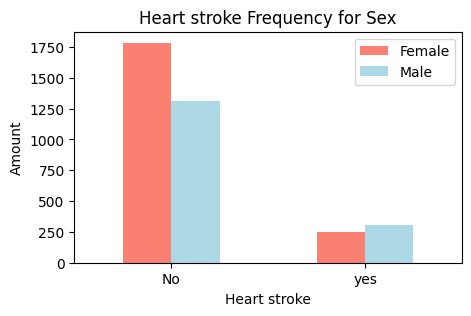

In [35]:
pd.crosstab(data0['Heart_ stroke'],data0['Gender']).plot(kind='bar',figsize=(5, 3),color=['salmon', 'lightblue']);
plt.title("Heart stroke Frequency for Sex")
plt.xlabel("Heart stroke")
plt.ylabel("Amount")
plt.legend(["Female", "Male"])
plt.xticks(rotation=0);

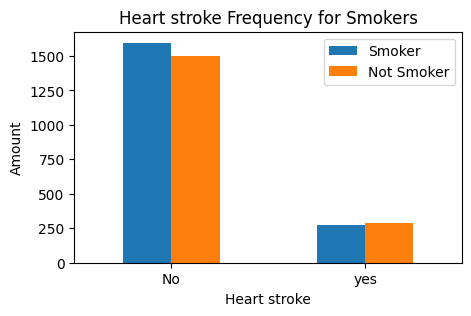

In [41]:
pd.crosstab(data0['Heart_ stroke'],data0['currentSmoker']).plot(kind='bar',figsize=(5, 3));
plt.title("Heart stroke Frequency for Smokers")
plt.xlabel("Heart stroke")
plt.ylabel("Amount")
plt.legend(["Smoker", "Not Smoker"])
plt.xticks(rotation=0);

In [87]:
ctbl3 = pd.crosstab(data0["education"],data0["Heart_ stroke"])
ctbl3=ctbl3.div(ctbl3.sum(axis=1), axis=0)
ctbl3

Heart_ stroke,No,yes
education,,
graduate,0.876238,0.123762
postgraduate,0.858156,0.141844
primaryschool,0.881017,0.118983
uneducated,0.809305,0.190695


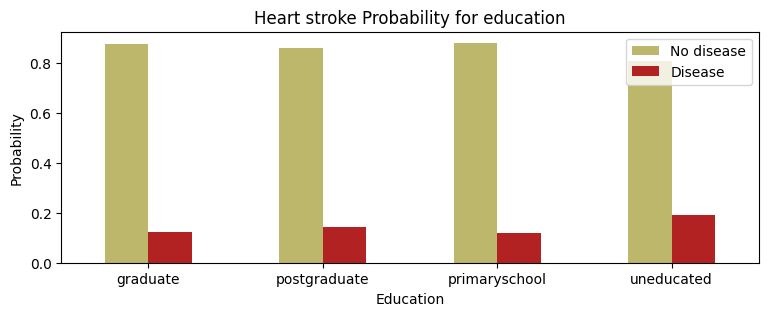

In [92]:
ctbl3.plot(kind='bar',figsize=(9, 3),color=['darkkhaki', 'firebrick']);
plt.title("Heart stroke Probability for education")
plt.xlabel("Education")
plt.ylabel("Probability")
plt.legend(["No disease", "Disease"])
plt.xticks(rotation=0);

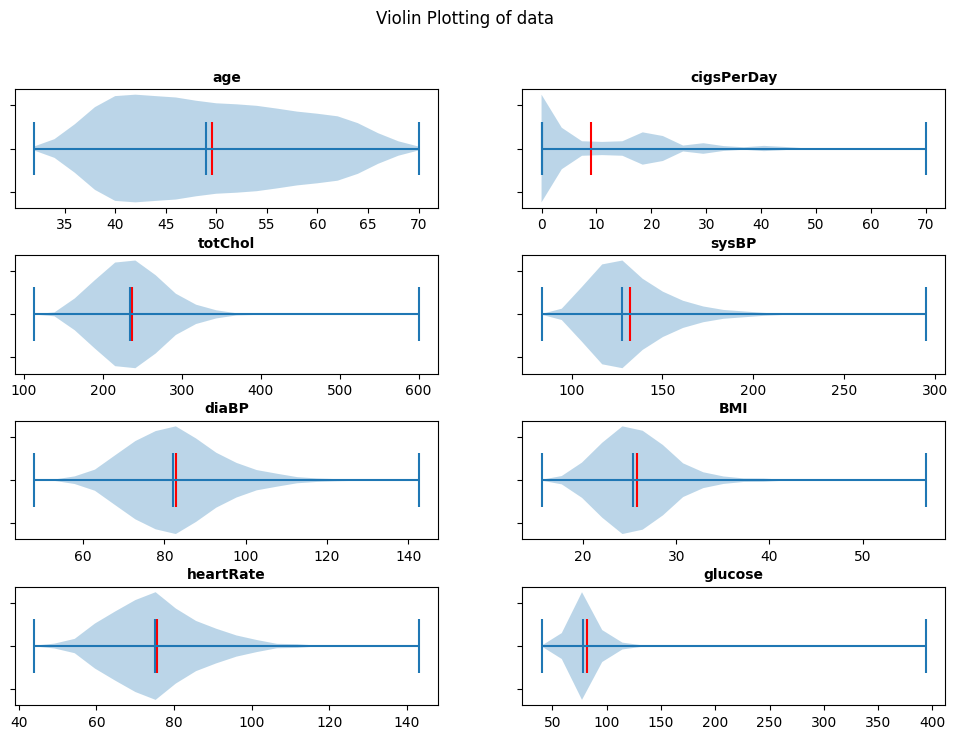

In [30]:
fs = 10  # fontsize
fig, axs = plt.subplots(nrows=4, ncols=2, figsize=(12, 8))

p=axs[0,0].violinplot(data['age'], vert=False, points=20, showmeans=True, showextrema=True, showmedians=True)
axs[0,0].set_title('age', fontsize=fs,fontweight='bold')
p['cmeans'].set_color('r')
p=axs[0,1].violinplot(data['cigsPerDay'], vert=False, points=20, showmeans=True, showextrema=True, showmedians=True)
axs[0,1].set_title('cigsPerDay', fontsize=fs,fontweight='bold')
p['cmeans'].set_color('r')
p=axs[1,0].violinplot(data['totChol'], vert=False, points=20, showmeans=True, showextrema=True, showmedians=True)
axs[1,0].set_title('totChol', fontsize=fs,fontweight='bold')
p['cmeans'].set_color('r')
p=axs[1,1].violinplot(data['sysBP'], vert=False, points=20, showmeans=True, showextrema=True, showmedians=True)
axs[1,1].set_title('sysBP', fontsize=fs,fontweight='bold')
p['cmeans'].set_color('r')
p=axs[2,0].violinplot(data['diaBP'], vert=False, points=20, showmeans=True, showextrema=True, showmedians=True)
axs[2,0].set_title('diaBP', fontsize=fs,fontweight='bold')
p['cmeans'].set_color('r')
p=axs[2,1].violinplot(data['BMI'], vert=False, points=20, showmeans=True, showextrema=True, showmedians=True)
axs[2,1].set_title('BMI', fontsize=fs,fontweight='bold')
p['cmeans'].set_color('r')
p=axs[3,0].violinplot(data['heartRate'], vert=False, points=20, showmeans=True, showextrema=True, showmedians=True)
axs[3,0].set_title('heartRate', fontsize=fs,fontweight='bold')
p['cmeans'].set_color('r')
p=axs[3,1].violinplot(data['glucose'], vert=False, points=20, showmeans=True, showextrema=True, showmedians=True)
axs[3,1].set_title('glucose', fontsize=fs,fontweight='bold')
p['cmeans'].set_color('r')
for ax in axs.flat:
    ax.set_yticklabels([])


fig.suptitle('Violin Plotting of data')
fig.subplots_adjust(hspace=0.4)
plt.show()

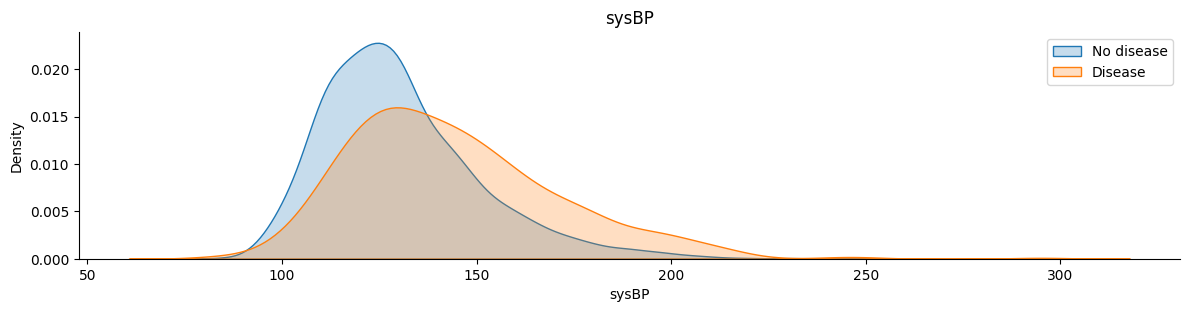

<Figure size 640x480 with 0 Axes>

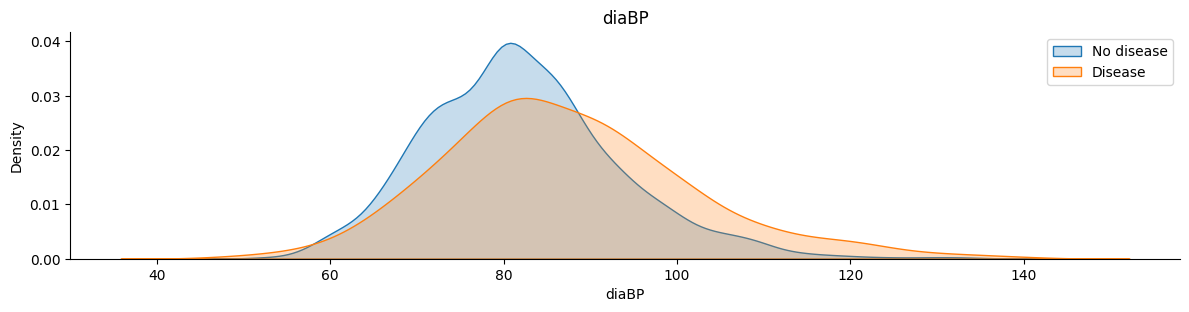

<Figure size 640x480 with 0 Axes>

In [126]:
# Compare Resting Blood Pressure As Per Sex Column
g=sns.FacetGrid(data0,hue='Heart_ stroke',aspect=4)
g.map(sns.kdeplot,'sysBP',fill=True)
plt.legend(["No disease", "Disease"])
plt.title('sysBP')
fig=plt.figure()
fig.tight_layout()
figsize=(4,5)
plt.show()


g=sns.FacetGrid(data0,hue='Heart_ stroke',aspect=4)
g.map(sns.kdeplot,'diaBP',fill=True)
plt.legend(["No disease", "Disease"])
plt.title('diaBP')
fig=plt.figure()
fig.tight_layout()
figsize=(4,5)
plt.show()

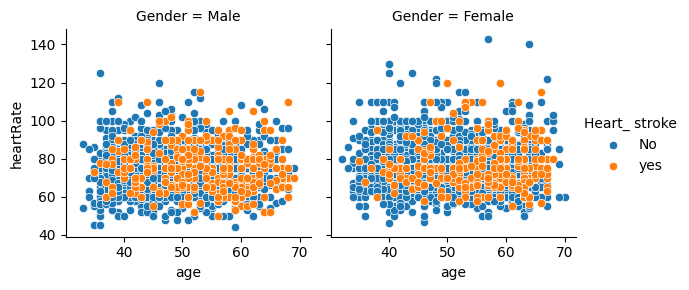

In [111]:
g = sns.FacetGrid(data0, col="Gender", hue="Heart_ stroke")
g.map_dataframe(sns.scatterplot, x="age", y="heartRate")
g.add_legend()

<Figure size 1000x500 with 0 Axes>

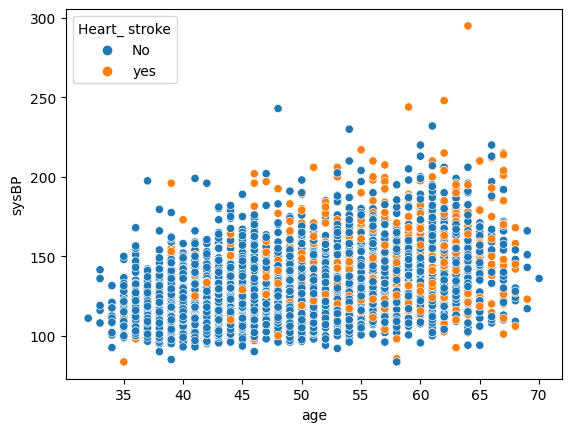

<Figure size 1000x500 with 0 Axes>

In [137]:
sns.scatterplot(data = data0, x='age', y='sysBP',hue='Heart_ stroke')
plt.figure(figsize=(10, 5))

<Axes: >

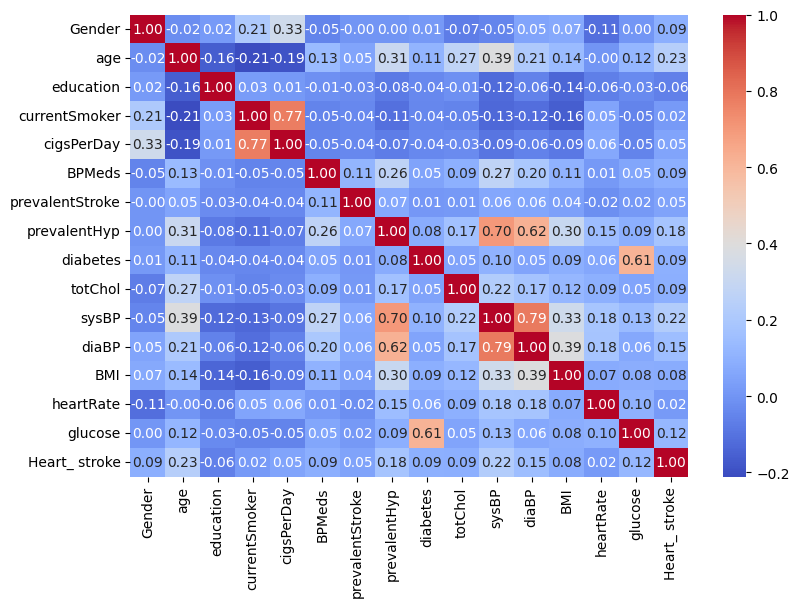

In [147]:
corr = data.corr()
plt.figure(figsize=(9,6),dpi=100)
sns.heatmap(corr,cmap="coolwarm",fmt=".2f",annot=True)

In [151]:
#Outliers removal
outliersThreshold = 0.005
q_low = data.quantile(outliersThreshold)
q_hi = data.quantile(1-outliersThreshold)
logic = True
for col in data.columns:
  logic = logic & (data[col]<=q_hi[col]) & (data[col]>=q_low[col])
data2 = data[logic]

<Axes: >

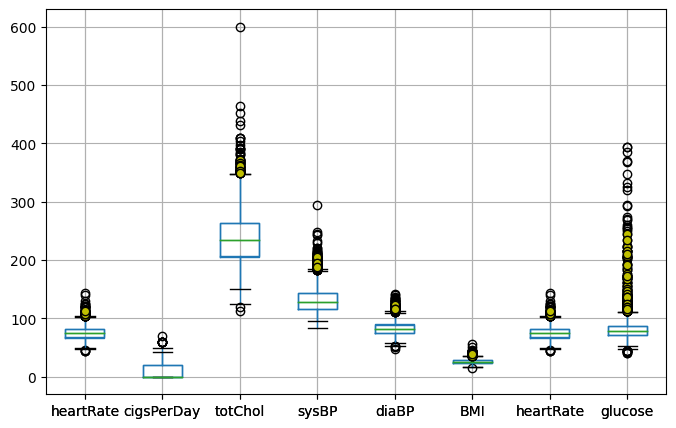

In [157]:
flierprops=dict(marker='o', markerfacecolor='y', linestyle='none')
data.boxplot(['heartRate','cigsPerDay','totChol','sysBP','diaBP','BMI','heartRate','glucose'],figsize=(8, 5))
data2.boxplot(['heartRate','cigsPerDay','totChol','sysBP','diaBP','BMI','heartRate','glucose'],flierprops=flierprops,figsize=(8, 5))